In [2]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
rfm = pd.read_csv(r'RFM.csv')
rfm_2 = pd.read_csv(r'RFM_2.csv')

In [4]:
print(rfm.shape)
print(rfm_2.shape)

(3697, 3)
(3697, 4)


In [5]:
rfm.head()

,Frequency,Amount,Recency
0,-1.070949,-1.041614,2.136422
1,-0.375498,1.385298,-0.282050
2,0.631707,1.331702,-0.821629
3,-0.711233,-0.590055,1.982257
4,1.159290,1.045238,-0.657828


In [6]:
import time
from sklearn.metrics import silhouette_score

Training time(sec) =  6.6576666831970215


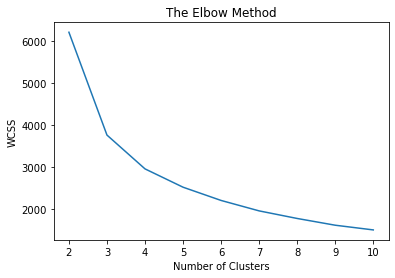

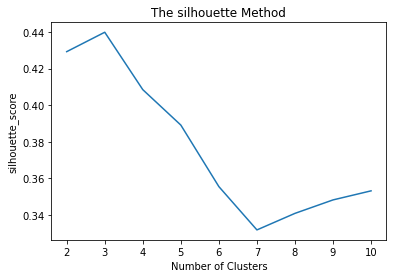

In [7]:
# sum of squared distances
wcss = []
sse = []

start_time = time.time()
for num_clusters in list(range(2,11)):
    kmeans = KMeans(n_clusters = num_clusters, init='k-means++', n_init=10, max_iter=100)
    kmeans.fit(rfm)
    wcss.append(kmeans.inertia_)
    sse.append(silhouette_score(rfm, kmeans.labels_))
print('Training time(sec) = ',(time.time() - start_time))

plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2,11),sse)
plt.title('The silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_score')
plt.show()

In [8]:
start_time = time.time()
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=10, max_iter=100)
kmeans.fit(rfm)
print('Training time(sec) = ',(time.time() - start_time))

print('Cluster centres:')
print(kmeans.cluster_centers_)
labels = kmeans.labels_

Training time(sec) =  0.12800216674804688
Cluster centres:
[[-0.6217946  -0.5995629   1.46925692]
 [-0.30256835 -0.28926543 -0.49604337]
 [ 1.51019977  1.45006285 -0.57563986]]


In [9]:
rfm_2['labels'] = labels
rfm_2.head()

,CustomerID,Frequency,Amount,Recency,labels
0,12346.0,2,0.00,326,0
1,12348.0,31,1797.24,75,1
2,12349.0,73,1757.55,19,2
3,12350.0,17,334.40,310,0
4,12352.0,95,1545.41,36,2


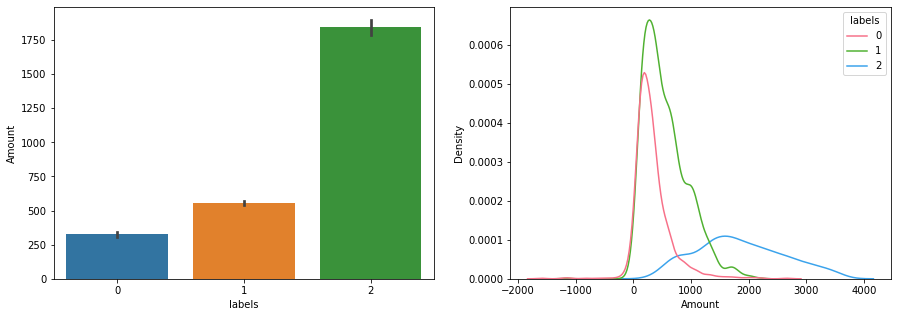

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(x=rfm_2.labels, y=rfm_2.Amount)

plt.subplot(1, 2, 2)
sns.kdeplot(data = rfm_2, x = 'Amount', hue = 'labels', palette=sns.color_palette("husl", 3))

plt.show()

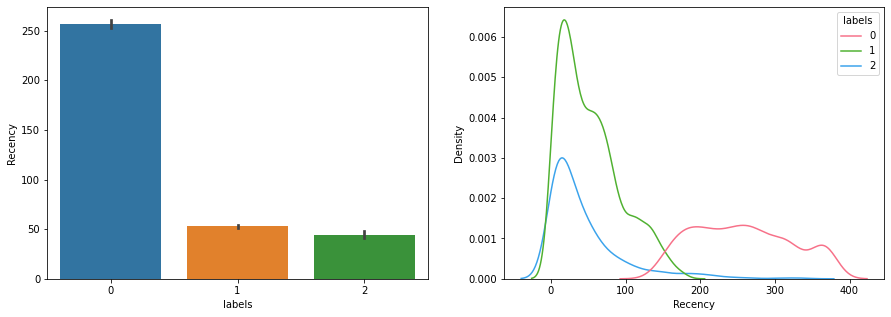

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(x=rfm_2.labels, y=rfm_2.Recency)

plt.subplot(1, 2, 2)
sns.kdeplot(data = rfm_2, x = 'Recency', hue = 'labels', palette=sns.color_palette("husl", 3))

plt.show()

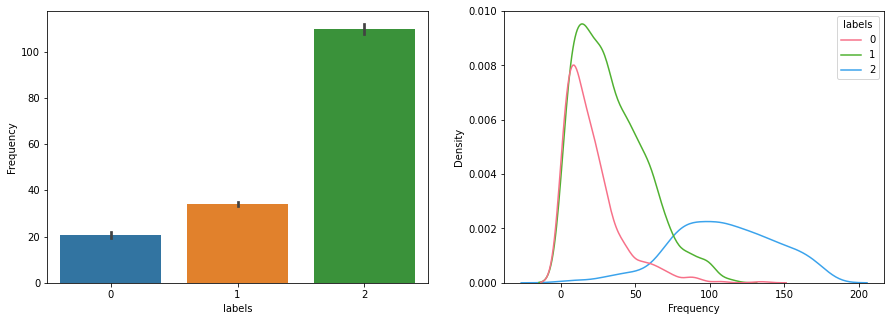

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(x=rfm_2.labels, y=rfm_2.Frequency)

plt.subplot(1, 2, 2)
sns.kdeplot(data = rfm_2, x = 'Frequency', hue = 'labels', palette=sns.color_palette("husl", 3))

plt.show()

In [13]:
amount_data = pd.DataFrame()
amount_data['class'] = list(set(labels))
amount_data['mean'] = rfm_2.groupby('labels')['Amount'].mean().values
amount_data['median'] = rfm_2.groupby('labels')['Amount'].median().values
amount_data['max'] = rfm_2.groupby('labels')['Amount'].max().values
amount_data['min'] = rfm_2.groupby('labels')['Amount'].min().values

amount_data

,class,mean,median,max,min
0,0,327.359161,264.620,2661.24,-1592.49
1,1,556.817723,463.730,2207.40,-1165.30
2,2,1844.383415,1779.345,3563.85,303.09


In [14]:
Recency_data = pd.DataFrame()
Recency_data['class'] = list(set(labels))
Recency_data['mean'] = rfm_2.groupby('labels')['Recency'].mean().values
Recency_data['median'] = rfm_2.groupby('labels')['Recency'].median().values
Recency_data['max'] = rfm_2.groupby('labels')['Recency'].max().values
Recency_data['min'] = rfm_2.groupby('labels')['Recency'].min().values

Recency_data

,class,mean,median,max,min
0,0,256.758549,254,374,142
1,1,52.766461,44,179,1
2,2,44.600254,28,338,1


In [15]:
Frequency_data = pd.DataFrame()
Frequency_data['class'] = list(set(labels))
Frequency_data['mean'] = rfm_2.groupby('labels')['Frequency'].mean().values
Frequency_data['median'] = rfm_2.groupby('labels')['Frequency'].median().values
Frequency_data['max'] = rfm_2.groupby('labels')['Frequency'].max().values
Frequency_data['min'] = rfm_2.groupby('labels')['Frequency'].min().values

Frequency_data

,class,mean,median,max,min
0,0,20.729534,16,137,1
1,1,34.021091,29,116,1
2,2,109.586294,109,178,1


## Heirarchical Clustering

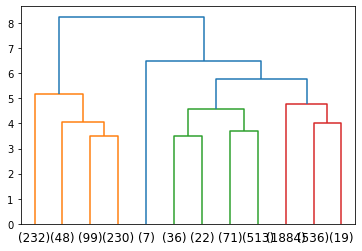

Total time(sec) =  1.2479541301727295


In [22]:
start_time = time.time()
mergings = linkage(rfm, method = "complete", metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',p=12)
plt.show()
print('Total time(sec) = ',(time.time() - start_time))

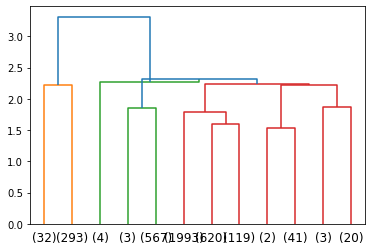

Total time(sec) =  1.4443168640136719


In [25]:
start_time = time.time()
mergings = linkage(rfm, method = "complete", metric='euclidean') 
# methods = 'single','complete','average','weighted','centroid','ward','median'
dendrogram(mergings,truncate_mode='lastp',p=12)
plt.show()
print('Total time(sec) = ',(time.time() - start_time))

In [28]:
rfm = pd.read_csv(r'RFM.csv')
rfm_2 = pd.read_csv(r'RFM_2.csv')

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2 ,linkage='complete')
start_time = time.time()
hc.fit(rfm)
print('Total time(sec) = ',(time.time() - start_time))
labels = hc.labels_

Total time(sec) =  0.8780841827392578


In [32]:
rfm_2['labels'] = labels
rfm_2.head()

,CustomerID,Frequency,Amount,Recency,labels
0,12346.0,2,0.00,326,0
1,12348.0,31,1797.24,75,1
2,12349.0,73,1757.55,19,1
3,12350.0,17,334.40,310,0
4,12352.0,95,1545.41,36,1


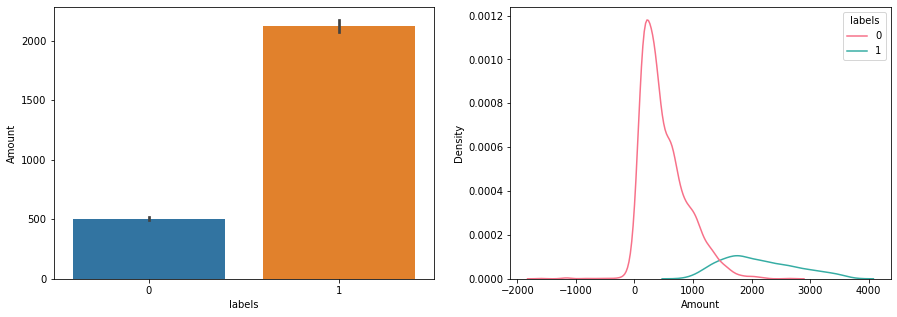

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(x=rfm_2.labels, y=rfm_2.Amount)

plt.subplot(1, 2, 2)
sns.kdeplot(data = rfm_2, x = 'Amount', hue = 'labels', palette=sns.color_palette("husl", 2))

plt.show()

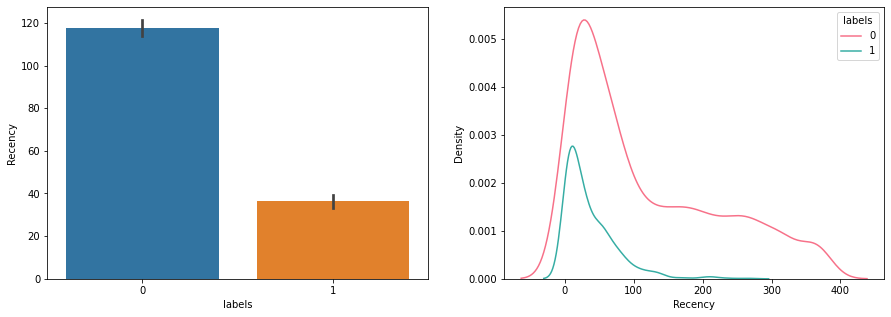

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(x=rfm_2.labels, y=rfm_2.Recency)

plt.subplot(1, 2, 2)
sns.kdeplot(data = rfm_2, x = 'Recency', hue = 'labels', palette=sns.color_palette("husl", 2))

plt.show()

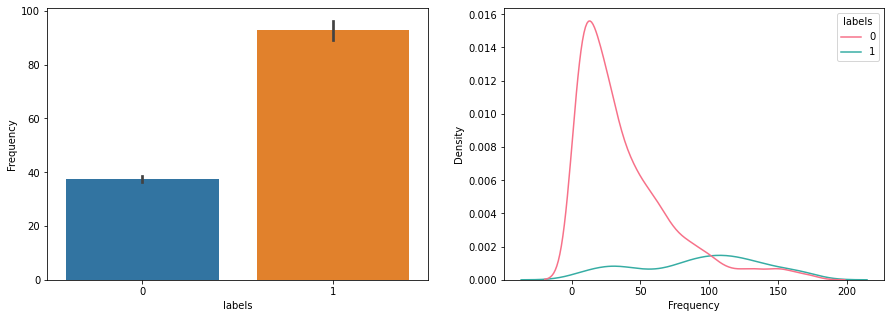

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.barplot(x=rfm_2.labels, y=rfm_2.Frequency)

plt.subplot(1, 2, 2)
sns.kdeplot(data = rfm_2, x = 'Frequency', hue = 'labels', palette=sns.color_palette("husl", 2))

plt.show()

In [38]:
amount_data = pd.DataFrame()
amount_data['class'] = list(set(labels))
amount_data['mean'] = rfm_2.groupby('labels')['Amount'].mean().values
amount_data['median'] = rfm_2.groupby('labels')['Amount'].median().values
amount_data['max'] = rfm_2.groupby('labels')['Amount'].max().values
amount_data['min'] = rfm_2.groupby('labels')['Amount'].min().values

amount_data

,class,mean,median,max,min
0,0,505.423301,397.205,2661.24,-1592.49
1,1,2119.839443,2041.850,3563.85,988.91


In [39]:
Recency_data = pd.DataFrame()
Recency_data['class'] = list(set(labels))
Recency_data['mean'] = rfm_2.groupby('labels')['Recency'].mean().values
Recency_data['median'] = rfm_2.groupby('labels')['Recency'].median().values
Recency_data['max'] = rfm_2.groupby('labels')['Recency'].max().values
Recency_data['min'] = rfm_2.groupby('labels')['Recency'].min().values

Recency_data

,class,mean,median,max,min
0,0,117.684909,74,374,1
1,1,36.262726,23,264,1


In [40]:
Frequency_data = pd.DataFrame()
Frequency_data['class'] = list(set(labels))
Frequency_data['mean'] = rfm_2.groupby('labels')['Frequency'].mean().values
Frequency_data['median'] = rfm_2.groupby('labels')['Frequency'].median().values
Frequency_data['max'] = rfm_2.groupby('labels')['Frequency'].max().values
Frequency_data['min'] = rfm_2.groupby('labels')['Frequency'].min().values

Frequency_data

,class,mean,median,max,min
0,0,37.570920,27,178,1
1,1,92.735632,99,177,1
